In [1]:
%load_ext autoreload
%autoreload 2

In [43]:
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
from matplotlib.colors import TABLEAU_COLORS
import imageio

import nvix.camera as nvixc
import nvix.utils as nvixu

---

In [26]:
xs, ys, zs = np.meshgrid([-1, 1], [-2, 2], [-3, 3])
xs = xs.ravel()
ys = ys.ravel()
zs = zs.ravel()

eye = np.array([20, 0, 0])
target = np.array([0, 0, 0])
up = np.array([0, 1, 0])
points = np.vstack((xs, ys, zs, np.ones_like(xs)))

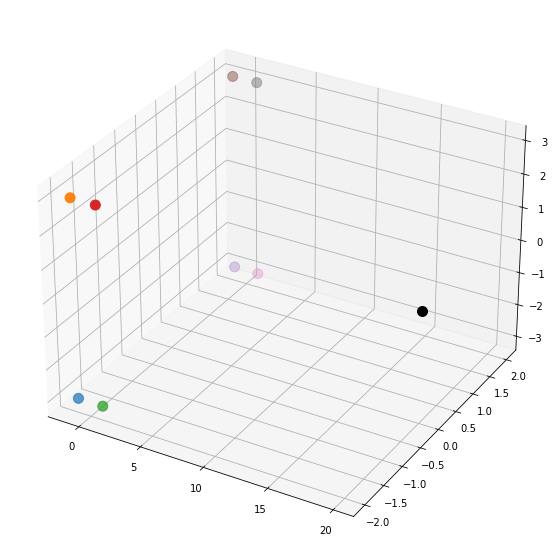

In [27]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(*eye, s=100, color='k')
ax.scatter(xs, ys, zs, color=list(TABLEAU_COLORS.keys())[:8], s=100)

In [28]:
M_view = nvixc.view(eye, target, up)
points_e = M_view @ points
eye_e = M_view @ np.append(eye, 1)

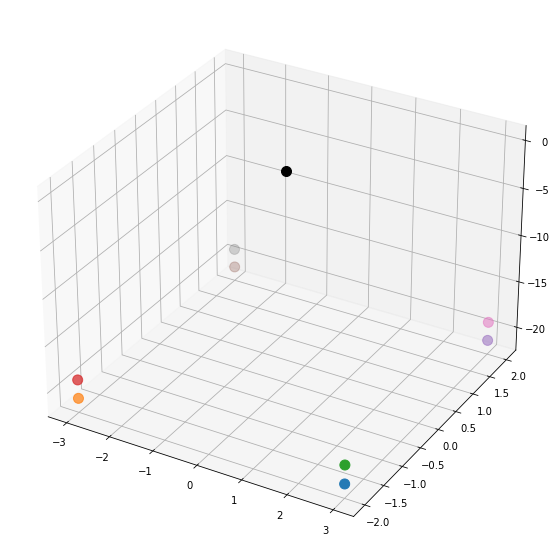

In [30]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(*eye_e[:3], s=100, color='k')
ax.scatter(*points_e[:3, :], color=list(TABLEAU_COLORS.keys())[:8], s=100)

In [32]:
points_e

DeviceArray([[  3.,  -3.,   3.,  -3.,   3.,  -3.,   3.,  -3.],
             [ -2.,  -2.,  -2.,  -2.,   2.,   2.,   2.,   2.],
             [-21., -21., -19., -19., -21., -21., -19., -19.],
             [  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.]],            dtype=float32)

In [35]:
extent = (-3, 3, -2, 2)
near = 19
far = 21
M_proj = nvixc.projection(extent, near, far)
points_c = M_proj @ points_e

In [36]:
points_c

DeviceArray([[ 19., -19.,  19., -19.,  19., -19.,  19., -19.],
             [-19., -19., -19., -19.,  19.,  19.,  19.,  19.],
             [ 21.,  21., -19., -19.,  21.,  21., -19., -19.],
             [ 21.,  21.,  19.,  19.,  21.,  21.,  19.,  19.]],            dtype=float32)

In [37]:
points_n = points_c[:3, :] / points_c[3, :]

In [38]:
points_n

DeviceArray([[ 0.9047619, -0.9047619,  1.       , -1.       ,  0.9047619,
              -0.9047619,  1.       , -1.       ],
             [-0.9047619, -0.9047619, -1.       , -1.       ,  0.9047619,
               0.9047619,  1.       ,  1.       ],
             [ 1.       ,  1.       , -1.       , -1.       ,  1.       ,
               1.       , -1.       , -1.       ]], dtype=float32)

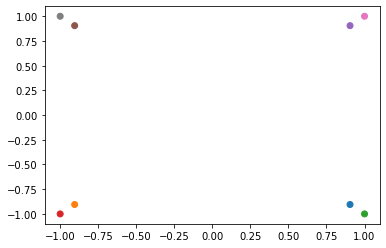

In [40]:
plt.scatter(points_n[0], points_n[1], color=list(TABLEAU_COLORS.keys())[:8])

In [41]:
a = np.array([1, 2, 3])

In [44]:
b = jnp.array([4, 5, 6])

In [45]:
jnp.vstack((a, b))

DeviceArray([[1, 2, 3],
             [4, 5, 6]], dtype=int32)

In [46]:
extent = [-1, 1, -2, 2]
D = 2
fovy, aspect = nvixu.extent2fov(extent, D)

In [50]:
nvixu.fov2extent(fovy, aspect, D)

array([-1.,  1., -2.,  2.])